# Loading in required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis - EDA

# Import file Data ==> Nobel

In [2]:
nobel = pd.read_csv('nobel.csv')
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [3]:
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

In [4]:
nobel.describe()

,year,laureate_id
count,1000.000000,1000.000000
mean,1973.721000,509.099000
std,34.523195,298.130617
min,1901.000000,1.000000
25%,1949.750000,250.750000
50%,1979.000000,500.500000
75%,2003.000000,764.250000
max,2023.000000,1034.000000


# Handling & Missing Values

In [5]:
nobel = nobel.dropna(subset=
['motivation','birth_date','birth_city','birth_country','sex','organization_name','organization_city','organization_country',
 'death_date','death_city','death_country'])

In [6]:
nobel.isnull().sum()

year                    0
category                0
prize                   0
motivation              0
prize_share             0
laureate_id             0
laureate_type           0
full_name               0
birth_date              0
birth_city              0
birth_country           0
sex                     0
organization_name       0
organization_city       0
organization_country    0
death_date              0
death_city              0
death_country           0
dtype: int64

In [7]:
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,Liverpool,United Kingdom,1932-09-16,Putney Heath,United Kingdom


# The most commonly awarded gender and birth country?

In [8]:
# the most commonly awarded gender
top_gender = nobel['sex'].value_counts().idxmax()

# the most commonly awarded birth country
top_country = nobel['birth_country'].value_counts().idxmax()

print(top_gender)
print(top_country)

Male
United States of America


# The Heighst ration winners in USA 

1990


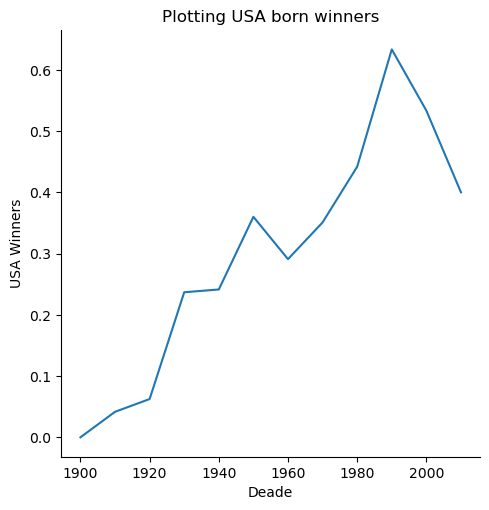

In [9]:
# Create column calculate the Decade
nobel['decade'] = (nobel['year'] // 10)*10
# winners in USA 
nobel['usa_winners'] = nobel['birth_country'] == 'United States of America'
ration_winner = nobel.groupby('decade',as_index=False)['usa_winners'].mean()
max_usa_decade = ration_winner[ration_winner['usa_winners'] == ration_winner['usa_winners'].max()]['decade'].values[0]
print(max_usa_decade)

# create vis
sns.relplot(kind='line',x='decade', y='usa_winners',data= ration_winner)
plt.title('Plotting USA born winners')
plt.xlabel('Deade')
plt.ylabel('USA Winners')
plt.show()

# Calculating the proportion of female laureates per decade

{2000: 'Economics'}


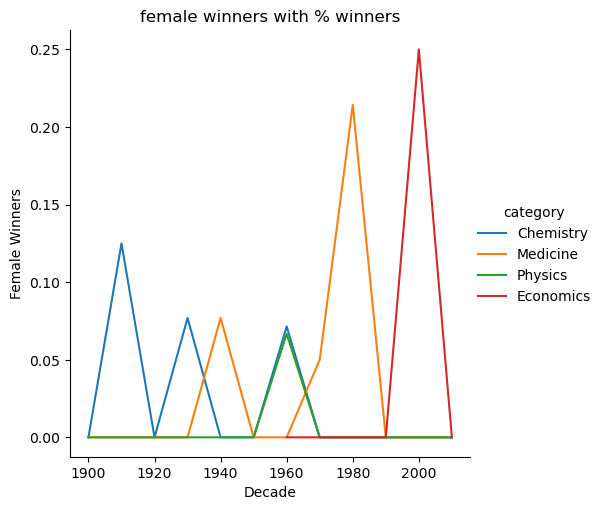

In [10]:
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel['sex'] == 'Female'
prop_fema_winner = nobel.groupby(['decade','category'],as_index=False)['female_winner'].mean()
female_dec_categ = prop_fema_winner[prop_fema_winner['female_winner'] == prop_fema_winner['female_winner'].max()][['decade','category']]

max_female_dic = {female_dec_categ['decade'].values[0]:female_dec_categ['category'].values[0]}
print(max_female_dic)
# create Visu female winners

sns.relplot(x= 'decade', y= 'female_winner', data= prop_fema_winner, hue ='category', kind= 'line')
plt.title('female winners with % winners')
plt.xlabel('Decade')
plt.ylabel('Female Winners')
plt.show()

# The first woman to receive a Nobel Prize, and in what category?

In [11]:
# Find the frist woman win the prize and in what category
woman_winners = nobel[nobel['female_winner']]
if not woman_winners.empty:
    frist_woman = woman_winners.sort_values(by='year').iloc[0]
    frist_woman_name = frist_woman['full_name']
    frist_category = frist_woman['category']
    country_name = frist_woman['birth_country']
    print(f'The Frist Woman: {frist_woman_name} \t Category: {frist_category}\t Country: {country_name}')

The Frist Woman: Marie Curie, née Sklodowska 	 Category: Chemistry	 Country: Russian Empire (Poland)


# Selecting the laureates that have received 2 or more prizes

In [12]:
repet_list = []
# ----------- Check Individual full name -------
count_name = nobel['full_name'].value_counts() 
repet_name = count_name[count_name >1].index
# ------------- Check Organization name -------
count_org = nobel['organization_name'].value_counts()
repet_org = count_org[count_org >= 2].index
# Display the result
repet_list.extend(repet_name)
repet_list.extend(repet_org)
print(repet_list)

['Frederick Sanger', 'John Bardeen', 'University of California', 'Harvard University', 'University of Cambridge', 'University of Chicago', 'California Institute of Technology (Caltech)', 'Stanford University', 'University of Oxford', 'Rockefeller University', 'Massachusetts Institute of Technology (MIT)', 'Cornell University', 'Columbia University', 'London University', 'Rockefeller Institute for Medical Research', 'University of Heidelberg', 'Berlin University', 'University College', 'Princeton University', 'Uppsala University', 'MRC Laboratory of Molecular Biology', 'Institut Pasteur', 'Goettingen University', 'Munich University', 'Harvard Medical School', 'Sorbonne University', 'Washington University', 'National Institutes of Health', 'University of Wisconsin', 'University of Pennsylvania', 'Kiel University', 'Stockholm University', 'University of Oslo', 'Imperial College', 'Academy of Sciences', 'Copenhagen University', 'University of Zurich', 'Yale University', 'Karolinska Institu

In [13]:
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade,usa_winners,female_winner
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,...,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,1900,False,False
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),...,Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,1900,False,False
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),...,Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany,1900,False,False
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,...,Male,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany,1900,False,False
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,294,Individual,Ronald Ross,1857-05-13,Almora,...,Male,University College,Liverpool,United Kingdom,1932-09-16,Putney Heath,United Kingdom,1900,False,False


In [14]:
nobel['category'].unique()

array(['Chemistry', 'Medicine', 'Physics', 'Economics'], dtype=object)

# Number of awards in each Category

In [15]:
count_category = nobel['category'].value_counts()
print(count_category)

category
Medicine     142
Physics      116
Chemistry    110
Economics     38
Name: count, dtype: int64


# Collect data by sex and category and calculate the number of winners in each group

In [26]:
# Collect data by sex and category and calculate the number of winners in each group

sex_category_counts = nobel.groupby(['sex', 'category']).size().reset_index(name='win_count')
pivot_sex_cate = sex_category_counts.pivot(index = 'category',columns = 'sex',values = 'win_count')

# Display Result

print(pivot_sex_cate)

sex        Female  Male
category               
Chemistry       3   107
Economics       1    37
Medicine        5   137
Physics         1   115


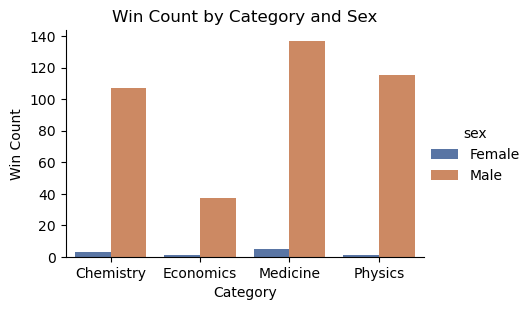

In [29]:
# Create Vis Count win by category and sex
g = sns.catplot(x = 'category',y = 'win_count',hue='sex', data = sex_category_counts,
            kind = 'bar',height=3,aspect=1.5,palette=['#4c72b0', '#dd8452'])
plt.title('Win Count by Category and Sex', fontsize=12)
g.set_axis_labels("Category", "Win Count",size=10)
plt.show()

# collect data by sex and Decade to know the winner's sex per decade

In [18]:
# Group data by sex and decade, counting the occurrences
decade_sex = nobel.groupby(['sex','decade']).size().reset_index(name = 'decade_sex')

# Pivot the DataFrame so that 'decade' becomes the index, 'sex' the columns, and 'decade_sex' the values
df_dec_sex = decade_sex.pivot(index='decade', columns='sex', values='decade_sex')

# Fill all NaN Value and convert to int
df_dec_sex = df_dec_sex.fillna(0).astype(int)
# Display Data
print(df_dec_sex)

sex     Female  Male
decade              
1900         0    28
1910         1    23
1920         0    32
1930         1    37
1940         1    28
1950         0    50
1960         2    53
1970         1    56
1980         3    40
1990         0    30
2000         1    14
2010         0     5


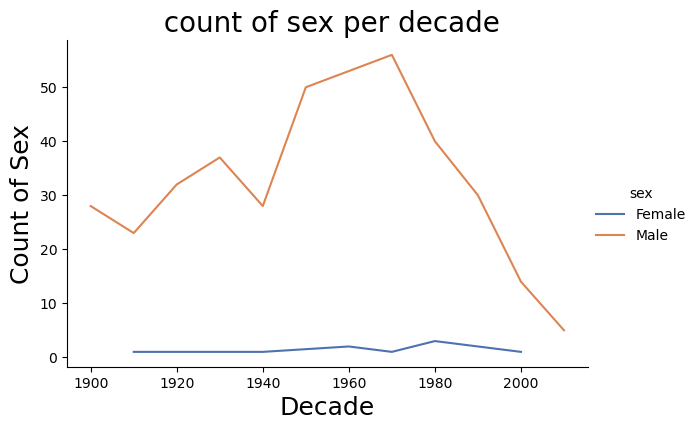

In [30]:
g = sns.relplot(x='decade', y= 'decade_sex', data= decade_sex, hue = 'sex', kind='line',
                height=4,aspect=1.5,palette=['#4c72b0', '#dd8452'])
plt.title(' count of sex per decade',fontsize=20)
g.set_axis_labels('Decade', 'Count of Sex',fontsize=18)
plt.show()

# Who is first man to win the Nobel

In [20]:
nobel['male_winner'] = nobel['sex'] == 'Male'
man_winners = nobel[nobel['male_winner']]
if not man_winners.empty:
    frist_man = man_winners.sort_values(by='year').iloc[0]
    frist_man_name = frist_man['full_name']
    frist_category = frist_man['category']
    country_name = frist_man['birth_country']
    print(f'The Frist Man: {frist_man_name} \t Category: {frist_category}\t Country: {country_name}')

The Frist Man: Jacobus Henricus van 't Hoff 	 Category: Chemistry	 Country: Netherlands


In [21]:
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade,usa_winners,female_winner,male_winner
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,...,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,1900,False,False,True
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),...,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,1900,False,False,True
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),...,Munich University,Munich,Germany,1923-02-10,Munich,Germany,1900,False,False,True
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,...,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany,1900,False,False,True
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,294,Individual,Ronald Ross,1857-05-13,Almora,...,University College,Liverpool,United Kingdom,1932-09-16,Putney Heath,United Kingdom,1900,False,False,True


In [22]:
nobel['prize_share'].unique()

array(['1/1', '1/2', '1/4', '1/3'], dtype=object)

## How many times has the the award been shared and how many entries

In [23]:
# count prize share 
count_prize_share = nobel['prize_share'].value_counts()
print(count_prize_share)

prize_share
1/2    148
1/1    145
1/3     90
1/4     23
Name: count, dtype: int64


# Sharing the award across decades

In [24]:
# grouped by decade and prize_share called decade_shera
decade_shera = nobel.groupby(['decade', 'prize_share']).size().reset_index(name='prize_decade_share')

# create pivot table 
prize_decade = decade_shera.pivot(index='decade', columns='prize_share', values='prize_decade_share')

# Fill NaN Values (0) and convert to int
prize_decade = prize_decade.fillna(0).astype(int)

# Total award per decade
prize_decade['total'] = prize_decade.sum(axis=1)

# grouped decade  and sex  new column called count
nobel_sex = nobel.groupby(['decade', 'sex']).size().reset_index(name='count')

# create piovt table nobel_sex and fill NaN values (0) and convert to int
nobel_sex_pivot = nobel_sex.pivot(index='decade', columns='sex', values='count').fillna(0).astype(int)

# Merge two pivot tables nobel_sex and prize_decade
prize_decade = prize_decade.merge(nobel_sex_pivot, on='decade', how='left')

cate_decade = nobel.groupby(['decade','category']).size().reset_index(name = 'Count')
cate_decade_piovt = cate_decade.pivot(index='decade',columns='category', values='Count').fillna(0).astype(int)
prize_decade = prize_decade.merge(cate_decade_piovt, on='decade',how='left')
# Display Result
print(prize_decade)


        1/1  1/2  1/3  1/4  total  Female  Male  Chemistry  Economics  \
decade                                                                  
1900     20    7    0    1     28       0    28          9          0   
1910     20    4    0    0     24       1    23          8          0   
1920     20   12    0    0     32       0    32         10          0   
1930     17   18    3    0     38       1    37         13          0   
1940     14    8    3    4     29       1    28          9          0   
1950     11   23   14    2     50       0    50         14          0   
1960     12   17   20    6     55       2    53         14          2   
1970     13   24   18    2     57       1    56         14         12   
1980     13   12   13    5     43       3    40          7          9   
1990      4   15   11    0     30       0    30          6          9   
2000      0    6    6    3     15       1    14          5          4   
2010      1    2    2    0      5       0     5    

# Plotting award across decade

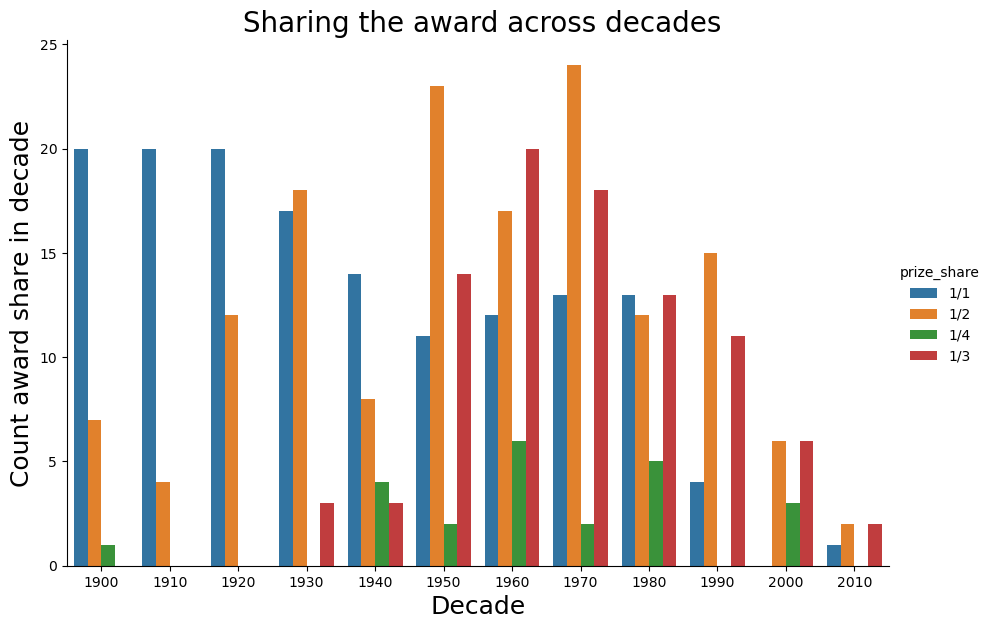

In [25]:
g=sns.catplot(x= 'decade',y= 'prize_decade_share',data= decade_shera, hue='prize_share',
            kind='bar',height=6,aspect=1.5)
plt.title(' Sharing the award across decades',fontsize=20)
g.set_axis_labels('Decade', 'Count award share in decade',fontsize=18)
plt.show()